In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.model_selection as smo
import sklearn.preprocessing as sp
import sklearn.svm as ss
import sklearn.naive_bayes as sn
import sklearn.metrics as sme

In [ ]:
df = pd.read_csv("sample_data/dataset_phishing.csv")

df['status'] = df['status'].map({'legitimate':0, 'phishing':1})

df = df.drop(columns=['url','path_extension'])

X = df.drop('status', axis=1)
y = df['status']

X_train, X_test, y_train, y_test = smo.train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

scaler = sp.StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)



SVM result
              precision    recall  f1-score   support

           0       0.97      0.78      0.87      1715
           1       0.82      0.98      0.89      1714

    accuracy                           0.88      3429
   macro avg       0.90      0.88      0.88      3429
weighted avg       0.90      0.88      0.88      3429



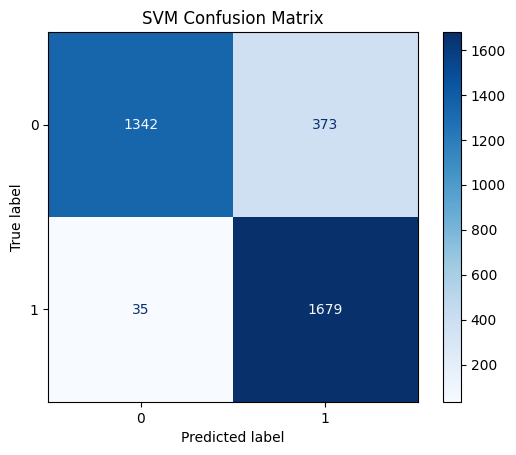

In [ ]:
svm = ss.SVC(kernel='rbf', C=1, gamma=0.2, random_state=50)
svm.fit(X_train_std, y_train)
y_pred_svm = svm.predict(X_test_std)

print("SVM result")
print(sme.classification_report(y_test, y_pred_svm))

cm_svm = sme.confusion_matrix(y_test, y_pred_svm)
disp_svm = sme.ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm.classes_)
disp_svm.plot(cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()

Naive Bayes result
              precision    recall  f1-score   support

           0       0.81      0.64      0.71      1715
           1       0.70      0.85      0.77      1714

    accuracy                           0.74      3429
   macro avg       0.76      0.74      0.74      3429
weighted avg       0.76      0.74      0.74      3429



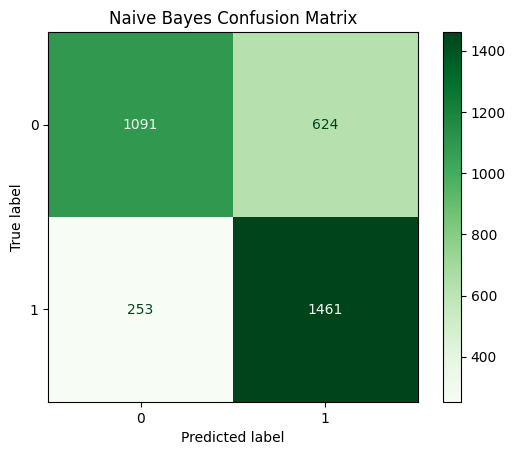

In [ ]:
nb = sn.GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)



print("Naive Bayes result")
print(sme.classification_report(y_test, y_pred_nb))

cm_nb = sme.confusion_matrix(y_test, y_pred_nb)
disp_nb = sme.ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb.classes_)
disp_nb.plot(cmap='Greens')
plt.title("Naive Bayes Confusion Matrix")
plt.show()

<div class="markdown-google-sans">

## 추가 리소스

### Colab에서 메모장 사용하기

</div>

- [Colab 개요](/notebooks/basic_features_overview.ipynb)
- [Markdown 가이드](/notebooks/markdown_guide.ipynb)
- [라이브러리 가져오기 및 종속 항목 설치하기](/notebooks/snippets/importing_libraries.ipynb)
- [GitHub에서 노트 저장 및 로드하기](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [대화형 양식](/notebooks/forms.ipynb)
- [대화형 위젯](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### 데이터로 작업하기
</div>

- [데이터 로드: 드라이브, 스프레드시트, Google Cloud Storage](/notebooks/io.ipynb)
- [차트: 데이터 시각화하기](/notebooks/charts.ipynb)
- [BigQuery 시작하기](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### 머신러닝 단기집중과정

<div>

다음은 Google 온라인 머신러닝 과정에서 가져온 일부 메모장입니다. <a href="https://developers.google.com/machine-learning/crash-course/">전체 과정 웹사이트</a>에서 자세한 내용을 확인하세요.
- [Pandas DataFrame 소개](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Pandas를 가속화하는 RAPIDS cuDF 소개](https://nvda.ws/rapids-cudf)
- [합성 데이터를 사용하는 tf.keras 선형 회귀](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### 가속 하드웨어 사용하기
</div>

- [GPU를 사용한 TensorFlow](/notebooks/gpu.ipynb)
- [Colab의 TPU](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### 추천 예시

</div>

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">이미지 분류기 재훈련</a>: 사전에 훈련된 이미지 분류기를 기반으로 꽃을 분류하기 위한 Keras 모델을 구축합니다.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">텍스트 분류</a>: IMDB 영화 리뷰를 <em>긍정적인 리뷰</em> 또는 <em>부정적인 리뷰</em>로 분류합니다.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">스타일 트랜스퍼</a>: 딥 러닝을 사용하여 이미지 간에 스타일을 전이시킵니다.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: 머신러닝 모델을 사용하여 SQuAD 데이터 세트의 질문에 답변합니다.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">동영상 보간 유형</a>: 동영상에서 첫 프레임과 마지막 프레임 사이에 발생한 내용을 예측합니다.
